In [11]:
import pandas as pd
train_df = pd.read_csv('train/train.csv')
train_meta_df = pd.read_csv('train/train_series_meta.csv')

In [12]:
print(train_df.head())
print(train_meta_df.head())

   patient_id  bowel_healthy  bowel_injury  extravasation_healthy  \
0       10004              1             0                      0   
1       10005              1             0                      1   
2       10007              1             0                      1   
3       10026              1             0                      1   
4       10051              1             0                      1   

   extravasation_injury  kidney_healthy  kidney_low  kidney_high  \
0                     1               0           1            0   
1                     0               1           0            0   
2                     0               1           0            0   
3                     0               1           0            0   
4                     0               1           0            0   

   liver_healthy  liver_low  liver_high  spleen_healthy  spleen_low  \
0              1          0           0               0           0   
1              1          0       

Formato de la imagen: JPEG
Tamaño de la imagen: (256, 256)
Modo de la imagen: L
Forma del array: (256, 256)
Valores únicos en el array: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 

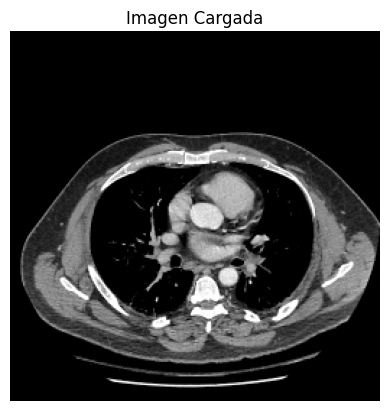

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

png_path = 'data/pacients/19/14374/229.jpeg'

try:
    image = Image.open(png_path)
except IOError:
    print(f"Error al abrir el archivo: {png_path}")

print(f"Formato de la imagen: {image.format}")
print(f"Tamaño de la imagen: {image.size}")
print(f"Modo de la imagen: {image.mode}")

if image.mode != 'L':
    image = image.convert('L')

image_array = np.array(image)

print(f"Forma del array: {image_array.shape}")
print(f"Valores únicos en el array: {np.unique(image_array)}")

plt.imshow(image_array, cmap='gray')
plt.title('Imagen Cargada')
plt.axis('off')
plt.show()


In [14]:
def preprocess_image(image_path, target_size=(128, 128)):
    image = Image.open(image_path)
    
    if image.mode != 'L':
        image = image.convert('L')
    
    image = image.resize(target_size)
    
    image_array = np.array(image) / 255.0
    
    image_array = np.expand_dims(image_array, axis=-1)
    
    return image_array

In [17]:
import os

train_images_dir = 'data/pacients'

train_image_paths = []
train_labels = []

for index, row in train_df.iterrows():
    patient_id = row['patient_id']
    any_injury = row['any_injury']
    
    patient_dir = os.path.join(train_images_dir, str(patient_id))
    if os.path.isdir(patient_dir):
        for series_id in os.listdir(patient_dir):
            series_dir = os.path.join(patient_dir, series_id)
            for image_name in os.listdir(series_dir):
                image_path = os.path.join(series_dir, image_name)
                train_image_paths.append(image_path)
                train_labels.append(any_injury)


In [21]:
y_train = np.array(train_labels)
y_train
train_image_paths

['data/pacients\\10004\\21057\\1001.jpeg',
 'data/pacients\\10004\\21057\\1006.jpeg',
 'data/pacients\\10004\\21057\\1011.jpeg',
 'data/pacients\\10004\\21057\\1016.jpeg',
 'data/pacients\\10004\\21057\\1021.jpeg',
 'data/pacients\\10004\\21057\\1026.jpeg',
 'data/pacients\\10004\\21057\\1031.jpeg',
 'data/pacients\\10004\\21057\\1036.jpeg',
 'data/pacients\\10004\\21057\\1041.jpeg',
 'data/pacients\\10004\\21057\\1046.jpeg',
 'data/pacients\\10004\\21057\\1051.jpeg',
 'data/pacients\\10004\\21057\\1056.jpeg',
 'data/pacients\\10004\\21057\\1061.jpeg',
 'data/pacients\\10004\\21057\\1066.jpeg',
 'data/pacients\\10004\\21057\\1071.jpeg',
 'data/pacients\\10004\\21057\\1076.jpeg',
 'data/pacients\\10004\\21057\\1081.jpeg',
 'data/pacients\\10004\\21057\\1086.jpeg',
 'data/pacients\\10004\\21057\\1091.jpeg',
 'data/pacients\\10004\\21057\\1096.jpeg',
 'data/pacients\\10004\\21057\\1101.jpeg',
 'data/pacients\\10004\\21057\\1106.jpeg',
 'data/pacients\\10004\\21057\\1111.jpeg',
 'data/paci

In [22]:
import pandas as pd

train_data = pd.DataFrame({
    'filename': train_image_paths,
    'class': train_labels
})

train_data['class'] = train_data['class'].astype(str)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    train_data,
    x_col='filename',
    y_col='class',
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    train_data,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 389758 validated image filenames belonging to 2 classes.
Found 97439 validated image filenames belonging to 2 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

def build_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Congelar las capas del modelo base

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 3)  
model = build_model(input_shape)

model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)




94765736/94765736 [==============================] - 4s 0us/step

Epoch 1/10


12180/12180 [==============================] - 23520s 2s/step - loss: 0.5804 - accuracy: 0.7200 - val_loss: 0.6267 - val_accuracy: 0.6718
Epoch 2/10
12180/12180 [==============================] - 22500s 2s/step - loss: 0.5675 - accuracy: 0.7259 - val_loss: 0.6301 - val_accuracy: 0.6726
Epoch 3/10
 3019/12180 [======>.......................] - ETA: 3:55:38 - loss: 0.5612 - accuracy: 0.7292

In [20]:
X_train = np.array([preprocess_image(path) for path in train_image_paths])

MemoryError: Unable to allocate 128. KiB for an array with shape (128, 128) and data type float64

In [16]:

X_train = np.array([preprocess_image(path) for path in train_image_paths])
y_train = np.array(train_labels)


MemoryError: Unable to allocate 128. KiB for an array with shape (128, 128) and data type float64